In [2]:
import pip
import numpy as np
import pandas as pd
import tabulate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
song_app = pd.read_csv("../../SongApp.csv",header=-1,)

In [4]:
song_app.head()

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,NaN,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,0.0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,1.0,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2.0,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,3.0,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [5]:
song_app.size

42661872

In [6]:
song_app.shape

(463716, 92)

In [7]:
# clean data
song_app = song_app.dropna()
song_app.__delitem__(0)

In [8]:
labels_column = song_app.iloc[:,0:1]
song_app.head()
song_app.__delitem__(1)

In [9]:
song_app['labels'] = labels_column

In [10]:
num_columns = song_app.columns.shape[0]
columns = list(range(num_columns - 1))
columns_name = list(map(str,columns)) + ['labels']
song_app.columns = columns_name
song_app.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,labels
1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,...,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061,2001
2,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,...,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345,2001
3,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,...,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382,2001
4,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,...,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903,2001
5,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,-4.69088,...,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263,2001


In [11]:
labels = song_app.values[0:,90]
print('labels size ', labels.size)
print('num of labels ', len(set(labels)))
print('max label ',max(labels))
print('min label ',min(labels))

labels size  463715
num of labels  89
max label  2011.0
min label  1922.0


In [12]:
import operator
# count by label
from collections import Counter
c = Counter(labels)
d = dict(c)
sorted_labels_size = sorted(d.items(), key=operator.itemgetter(1), reverse=True)
sorted_labels_size[0:20]

[(2007.0, 35376),
 (2006.0, 33824),
 (2005.0, 31454),
 (2008.0, 31244),
 (2009.0, 27907),
 (2004.0, 26680),
 (2003.0, 24574),
 (2002.0, 21291),
 (2001.0, 19414),
 (2000.0, 17354),
 (1999.0, 16358),
 (1998.0, 14245),
 (1997.0, 13639),
 (1996.0, 12669),
 (1995.0, 11806),
 (1994.0, 10882),
 (1993.0, 9562),
 (1992.0, 8615),
 (2010.0, 8363),
 (1991.0, 7751)]

In [12]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
results_pca = pca.fit_transform(song_app)

In [13]:
print('explained variance ratio : ',sum(pca.explained_variance_ratio_))

explained variance ratio :  0.993881299801


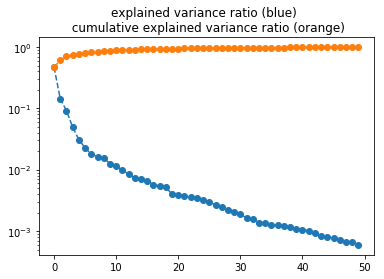

In [16]:
plt.semilogy(pca.explained_variance_ratio_, '--o');
plt.semilogy(pca.explained_variance_ratio_.cumsum(), '--o');
plt.title("explained variance ratio (blue) \n cumulative explained variance ratio (orange)")
plt.show()

In [12]:
x_data = song_app
x_data.__delitem__('labels')

In [13]:
# split into training and test data
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(417343, 90)
(46372, 90)
(417343,)
(46372,)


In [16]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=20,
                              random_state=0)

forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

Feature ranking:
1. feature 0 (0.014649)
2. feature 1 (0.012155)
3. feature 5 (0.012116)
4. feature 2 (0.011791)
5. feature 4 (0.011665)
6. feature 6 (0.011654)
7. feature 3 (0.011558)
8. feature 19 (0.011548)
9. feature 11 (0.011521)
10. feature 9 (0.011498)
11. feature 10 (0.011394)
12. feature 8 (0.011367)
13. feature 40 (0.011323)
14. feature 7 (0.011278)
15. feature 62 (0.011257)
16. feature 12 (0.011185)
17. feature 21 (0.011178)
18. feature 13 (0.011154)
19. feature 56 (0.011152)
20. feature 58 (0.011139)
21. feature 78 (0.011132)
22. feature 39 (0.011131)
23. feature 77 (0.011128)
24. feature 42 (0.011127)
25. feature 30 (0.011109)
26. feature 87 (0.011103)
27. feature 14 (0.011099)
28. feature 52 (0.011099)
29. feature 73 (0.011096)
30. feature 49 (0.011092)
31. feature 66 (0.011085)
32. feature 43 (0.011084)
33. feature 18 (0.011060)
34. feature 27 (0.011060)
35. feature 45 (0.011060)
36. feature 20 (0.011045)
37. feature 81 (0.011043)
38. feature 33 (0.011039)
39. feature 72

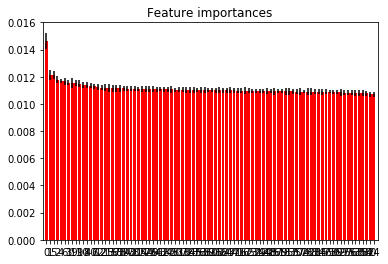

In [17]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [14]:
X_train.__delitem__('0')

In [15]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=20,
                              random_state=0)

forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

Feature ranking:
1. feature 4 (0.012487)
2. feature 0 (0.012062)
3. feature 1 (0.011915)
4. feature 5 (0.011907)
5. feature 3 (0.011748)
6. feature 10 (0.011718)
7. feature 2 (0.011661)
8. feature 8 (0.011617)
9. feature 18 (0.011603)
10. feature 7 (0.011578)
11. feature 9 (0.011567)
12. feature 6 (0.011543)
13. feature 61 (0.011538)
14. feature 39 (0.011531)
15. feature 20 (0.011324)
16. feature 76 (0.011321)
17. feature 77 (0.011312)
18. feature 71 (0.011285)
19. feature 81 (0.011280)
20. feature 57 (0.011269)
21. feature 51 (0.011266)
22. feature 44 (0.011258)
23. feature 28 (0.011258)
24. feature 29 (0.011257)
25. feature 86 (0.011246)
26. feature 72 (0.011243)
27. feature 13 (0.011241)
28. feature 65 (0.011236)
29. feature 48 (0.011235)
30. feature 19 (0.011234)
31. feature 84 (0.011232)
32. feature 55 (0.011232)
33. feature 50 (0.011232)
34. feature 11 (0.011227)
35. feature 67 (0.011223)
36. feature 35 (0.011223)
37. feature 38 (0.011220)
38. feature 32 (0.011201)
39. feature 47

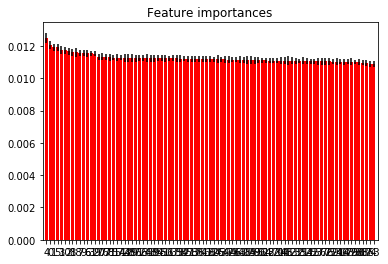

In [16]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
# les features faut pas y toucher ! :D